## Задание 1
>*Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.datasets import load_boston

In [3]:
# загрузим датасет в переменную boston
boston = load_boston()
# данные содержатся в значениях ключа  data
# названия признаков - это значения ключа "feature_names"
# создадим датафрейм из массива data. Названия колонок (признаков) возьмем из массива - feature_names
X = pd.DataFrame(boston.data, columns=boston.feature_names)
# создадим еще один датафрейм, в нем будут целевые значения. Колонку назовем - price
y = pd.DataFrame(boston.target, columns=["price"])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Всего столбцов 13, пропусков нет.

In [4]:
# чтобы разбить нашу выборку на тренировочную и тестовую (валидационную) загрузим функции "train_test_split"
from sklearn.model_selection import train_test_split
# разобьем наши датафреймы на тренировочные и тестовые. Если параметр test_size от 0 до 1, то он воспринимается как доля. В противном случае как количество 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# загрузим функцию масштабирования StandardScaler
# StandardScaler преобразует данные в колонках так, что среднее по колонке становится = 0, а стандартное отклонение = 1
# вычисляется как разница значения столбца в каждой строке и среднего по столбцу поделенное на стандартное отклонение по столбцу
from sklearn.preprocessing import StandardScaler

In [6]:
# инициализируем экземпляр объекта
scaler = StandardScaler()
# функция scaler.fit_transform(X_train) возвращает ndarray, поэтому создаем новый 
# pandas датафрейм в теми же названиями колонок, что и в исходном датафрейме.
# Делаем это для тренировочных и тестовых данных
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# Причем на тестовых данных применяем метод transform, а не fit_transform как для тренировочных
# fit_transform - это объединение методов fit и transform. fit - рассчитывает параметры,
# в данном случае среднее истандратное отклонение, а transform уже преобразует данные
# чтобы у нас сохранялся единый масштаб данных, для тренировочных и тестовых данных, в случае
# тестовых данных используем только метод transform, а параметры для него (среднее и стандартное отклонение) 
# берем рассчитанные методом fit для тренировочных данных
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
# импортируем модель t-SNE
from sklearn.manifold import TSNE

In [8]:
# создаем модель TSNE с указанными параметрами
# n_components - указывает сколько признаков должно остаться после понижения размерности.
# learning_rate - указывает как плотно будут располагаться точки.
# ВОПРОС - на видеоуроке использовали значение 150, здесь 250 - почему? Что хотели этим сказать или показать?
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
# применяем fit_transform к тренировочным данным и получаем двумерный массив ndarray
X_train_tsne = tsne.fit_transform(X_train_scaled)


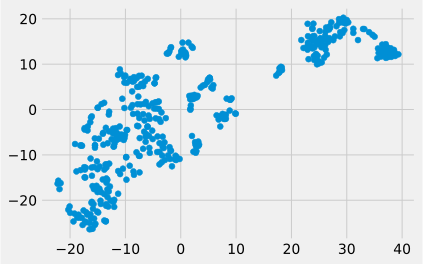

In [11]:
# отобразим зависимость оставшихся двух признаков
# ВОПРОС - это новые признаки или какие то из уже имеющихся?
plt.style.use('fivethirtyeight')
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**ВОПРОС** 
Ниже приведен график, который построен на модели, которая рассчитана с гиперпараметром learning_rate = 150. На графике видно, что зависимость признаков сменилась на противоположную (с прямой на обратную). **Вопрос - почему?**
Что вообще значит этот гиперпараметр и как его правильно подбирать?

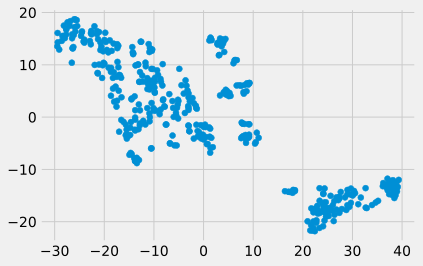

In [13]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.style.use('fivethirtyeight')
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

In [14]:
# Возвращаем назад модель для заданного значения гиперпараметра learning_rate = 250
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

## Задание 2
>*С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.*

In [15]:
# Загружаем библиотеку с KMeans
from sklearn.cluster import KMeans

In [16]:
# создаем экземпляр модели с заданными параметрами
km = KMeans(n_clusters=3, random_state=42, max_iter=100)


In [17]:
# вспоминаем как выглядит стандартизированный тренировочный датафрейм
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [18]:
# C помощью метода .fit_predict получаем массив, значения в котором равны номеру кластера для каждого измерения,
# который получился в результате работы модели KMeans
train_labels = km.fit_predict(X_train_scaled)
print(f'Получили массив ndarray с формой: {train_labels.shape}')
print()
print(train_labels)

Получили массив ndarray с формой: (404,)

[1 0 2 1 0 0 0 2 1 1 0 0 0 1 0 0 0 2 0 2 1 0 2 0 2 0 1 2 0 2 0 0 1 1 0 2 2
 0 0 2 2 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 2 0 1 1 1 1 2 0 1 1 1 2 1 0 0 1 1 2 2 0 1 1 0 1 0 2 2 2 0 0 2 0 0 0 1
 2 0 2 2 1 1 1 0 0 0 1 1 0 2 1 1 2 2 1 2 0 0 0 0 1 0 2 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 2 0 2 1 1 1 1 1 2 0 1 0 1 2 2 0 2 0 0 2 2 1 2 2 1 1 2 0 0 0 1 0 1
 1 2 2 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 2 0 0 0 0 2 0 1 0 1 2 1 0 1 1 1
 1 0 0 2 2 0 2 0 1 0 0 0 0 0 1 1 2 0 0 2 2 1 1 0 2 1 1 0 2 2 1 0 2 1 0 0 1
 0 1 0 0 2 0 0 0 0 0 0 2 1 0 1 0 0 2 0 1 1 2 1 0 1 0 0 1 2 2 0 1 2 1 1 1 0
 2 1 0 0 0 0 0 0 1 2 0 1 2 2 0 2 0 2 0 1 2 0 0 0 2 1 0 1 1 0 1 2 0 0 1 0 1
 1 0 0 1 2 0 0 2 0 0 0 1 0 0 0 0 1 0 1 0 2 2 1 2 1 0 1 2 0 1 2 0 2 0 2 0 2
 0 0 1 0 2 1 2 1 0 1 2 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 2 0 0 0 2 1 0]


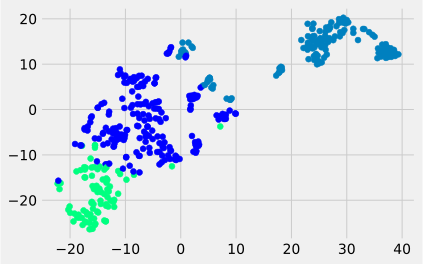

In [19]:
# возьмем распределение, которое получилось после работы алгоритма t-SNE и
# раскрасим с помощью train_labels, которые получились в результате работы алгоритма KMeans
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels, cmap='winter')
plt.show()

Видим обозначенные группы (кластеры)

In [20]:
# добавим в тренировочный датафрейм колонку с групповыми (кластерными) метками для каждого измерения
# ВОПРОС - ниже видно, что Python выдает предупреждение. ЧТо не так делаю? И как правильно? 
X_train['Cluster'] = train_labels
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  Cluster  404 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 45.8 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
# сформируем в общий датафрейм цену недвижимости
price_cluster = pd.concat([X_train, y_train], axis=1)
# вычислим средние значения для признаков CRIM и целевого значения price
for i in range(3):
  print(f'Среднее значение для признака CRIM в кластере {i} = {price_cluster.loc[price_cluster["Cluster"] == i]["CRIM"].mean()}')
print()
for i in range(3):  
  print(f'Среднее значение для признака price в кластере {i} = {price_cluster.loc[price_cluster["Cluster"] == i]["price"].mean()}')


Среднее значение для признака CRIM в кластере 0 = 0.42166020942408367
Среднее значение для признака CRIM в кластере 1 = 10.797028425196853
Среднее значение для признака CRIM в кластере 2 = 0.07356558139534886

Среднее значение для признака price в кластере 0 = 24.958115183246072
Среднее значение для признака price в кластере 1 = 16.165354330708666
Среднее значение для признака price в кластере 2 = 27.788372093023252


Наблюдаем явную зависимость для кластера 1 - самый высокий индекс криминальности, и соответственно самые низкие цены на недвижимость

## Задание 3
>*Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.*

In [24]:
# применяем сформированную ранее модель на тестовых данных. Замечаем, что используем метод 
# .predict, а не fit_predict. Также используем стандартизированный набор данных
test_labels = km.predict(X_test_scaled)
# Добавляем в тестовый датафрейм полученные метки групп.
X_test['Cluster'] = test_labels
# формируем объединенный тестовый датафрейм с признаками и целевым значением
price_cluster_test = pd.concat([X_test, y_test], axis=1)
# вычислим средние значения для признаков CRIM и и целевого значения price
for i in range(3):
  print(f'Среднее значение для признака CRIM в кластере {i} = {price_cluster_test.loc[price_cluster_test["Cluster"] == i]["CRIM"].mean()}')
print()
for i in range(3):  
  print(f'Среднее значение для признака price в кластере {i} = {price_cluster_test.loc[price_cluster_test["Cluster"] == i]["price"].mean()}')

Среднее значение для признака CRIM в кластере 0 = 0.26607882352941176
Среднее значение для признака CRIM в кластере 1 = 10.165531142857143
Среднее значение для признака CRIM в кластере 2 = 0.062060000000000004

Среднее значение для признака price в кластере 0 = 21.860784313725492
Среднее значение для признака price в кластере 1 = 16.437142857142856
Среднее значение для признака price в кластере 2 = 31.35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Опять же наблюдаем явную зависимость по признака криминальности и цены для кластера 1